<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-daniela-estevez/blob/main/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones

**Nombre 1:** Daniela Estevez Rodriguez

**Matricula 1:** A01793723
<br>
<br>
**Materia:** Ciencia y analítica de datos

**Profesor:** Victoria Guerrero Orozco

**Fecha:** 27 de Octubre de 2022

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [33]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.dot(np.dot(W,D),Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [34]:
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)
print(values) #D
print(vectors) #W

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


In [35]:
#Matriz 1

# define la matriz
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

# Reconstrucción de la matriz
values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

B= np.dot(np.dot(W,D),Winv)
print("-------Matriz reconstruida-------")
print(B.round())
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]
-----------------------------


In [36]:
#Matriz 2

# define la matriz
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")

# calcula la eigendescomposición
values, vectors = eig(A2)
print(values) #D
print(vectors) #W

# Reconstrucción de la matriz
values, vectors = np.linalg.eig(A2)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

B= np.dot(np.dot(W,D),Winv)
print("-------Matriz reconstruida-------")
print(B.round())
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [37]:
#Matriz 3

# define la matriz
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A3)
print("-----------------------------")

# calcula la eigendescomposición
values, vectors = eig(A3)
print(values) #D
print(vectors) #W

# Reconstrucción de la matriz
values, vectors = np.linalg.eig(A3)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

B= np.dot(np.dot(W,D),Winv)
print("-------Matriz reconstruida-------")
print(B.round())
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


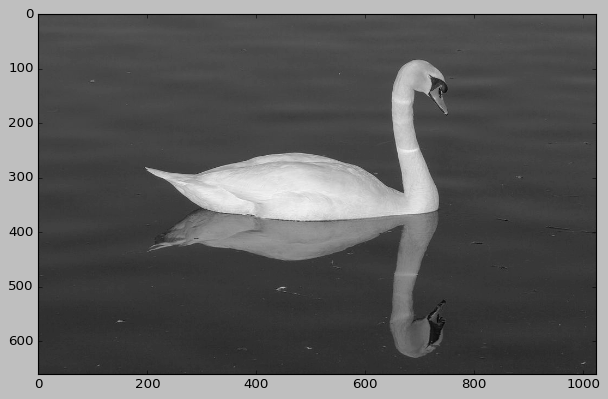

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F5228CB2190>


In [38]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [39]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [40]:
U.shape

(660, 660)

In [41]:
V.shape

(1024, 1024)

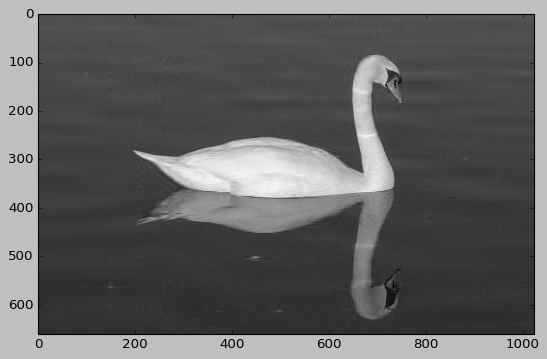

Felicidades la imagen está comprimida


In [42]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[ 14.  14.  14. ... 100. 100.  99.]


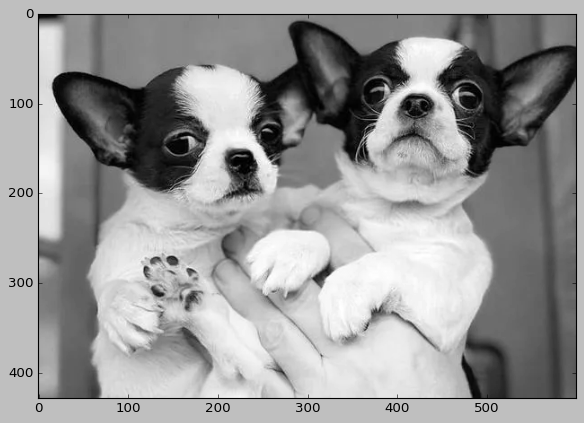

<PIL.Image.Image image mode=LA size=600x428 at 0x7F5228DB45D0>


In [43]:
#imagen 1

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://www.srperro.com/media/post/e08beed4-2222-499d-b103-50e611b32393.600x429.jpeg.webp')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [44]:
U,D,V = np.linalg.svd(imgmat)
print("Shape:",imgmat.shape)
print("U:",U.shape)
print("V:",V.shape)

Shape: (428, 600)
U: (428, 428)
V: (600, 600)


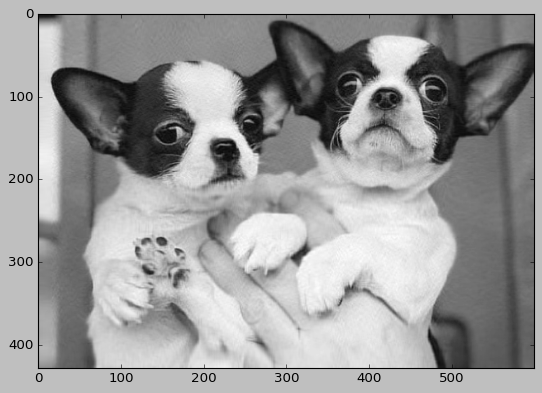

Felicidades la imagen está comprimida


In [45]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-428
#con 90 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 90
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(428X428)D(428X600)V(600,600)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(428X90)(90X90)(90X600)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[81. 69. 78. ... 71. 71. 70.]


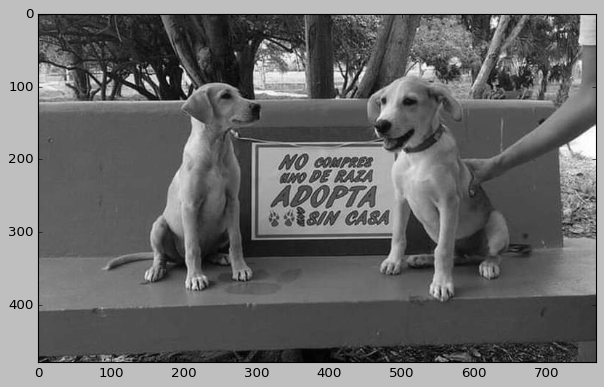

<PIL.Image.Image image mode=LA size=768x479 at 0x7F5228DAAD10>


In [46]:
#imagen 2

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://www.elheraldodechiapas.com.mx/local/o79q9j-enc-perritos.jpeg/alternates/LANDSCAPE_768/enc%20perritos.jpeg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [47]:
U,D,V = np.linalg.svd(imgmat)
print("Shape:",imgmat.shape)
print("U:",U.shape)
print("V:",V.shape)

Shape: (479, 768)
U: (479, 479)
V: (768, 768)


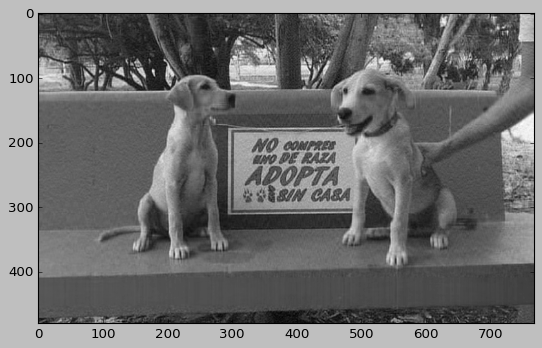

Felicidades la imagen está comprimida


In [48]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-479
#con 90 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 90
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(479X768)D(479X768)V(768,768)
        #=U(479Xnvalues)D(nvaluesXnvalue)V(nvaluesx768)

        #=U(479X90)(90X90)(90X768)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[ 88.  98. 107. ... 176. 182. 188.]


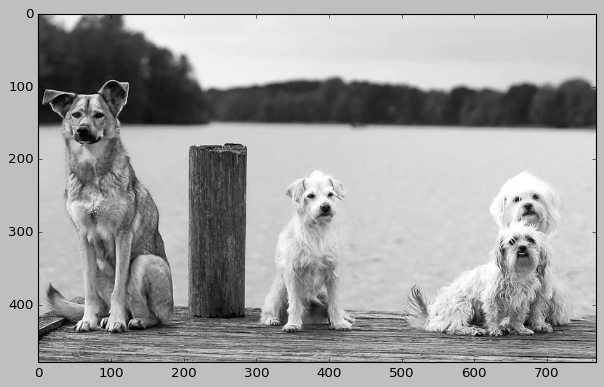

<PIL.Image.Image image mode=LA size=768x479 at 0x7F5228A5B390>


In [49]:
#imagen 3

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://www.elsoldepuebla.com.mx/doble-via/ciencia/aq3i5i-mucho-se-ha-dicho-a-lo-largo-de-la-historia-de-los-mejores-amigos-del-hombre-los-perros.jpg/alternates/LANDSCAPE_768/Mucho%20se%20ha%20dicho%20a%20lo%20largo%20de%20la%20historia%20de%20los%20mejores%20amigos%20del%20hombre,%20los%20perros.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [50]:
U,D,V = np.linalg.svd(imgmat)
print("Shape:",imgmat.shape)
print("U:",U.shape)
print("V:",V.shape)

Shape: (479, 768)
U: (479, 479)
V: (768, 768)


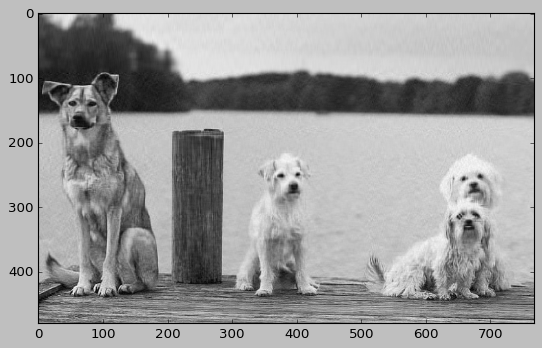

Felicidades la imagen está comprimida


In [51]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-479
#con 90 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 90
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(479X768)D(479X768)V(768,768)
        #=U(479Xnvalues)D(nvaluesXnvalue)V(nvaluesx768)

        #=U(479X90)(90X90)(90X768)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

In [52]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') #Estilo de gráficas similar al de la librería ggplot de R
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [53]:
# Cargar los datos
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Realizar transformación Z-score a las columnas
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Realizar el PCA
pca = PCA(n_components=2) # se estiman solo 2 PCs
X_new = pca.fit_transform(X) # se proyectan los datos originales en el espacio PCA

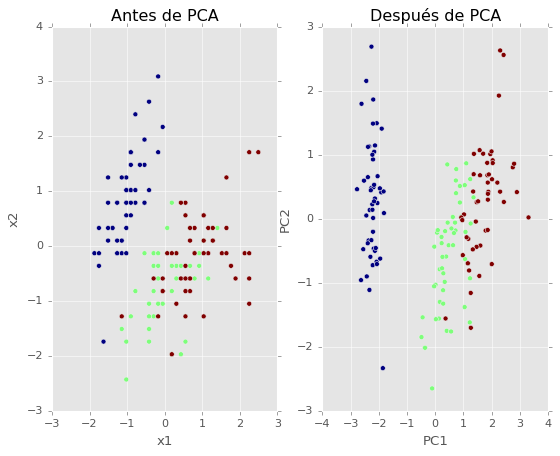

In [54]:
# Graficar los datos antes y después de PCA

fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Antes de PCA')

axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Después de PCA')

plt.show()

El gráfico anterior nos muestra como los 2 PCA's calculados explican casi toda la variabilidad de los datos.

In [55]:
# Ratio de varianza explicada
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


Del PCA, encontramos que PC1 explica el 73% de la varianza total y PC2 el 22% de la varianza total. De esta manera, en conjunto explican el 95% de la varianza.

In [56]:
# matriz de covarianza del espacio reducido
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [57]:
# Varianza explicada
pca.explained_variance_

array([2.93808505, 0.9201649 ])

Las dos matrices anteriores nos dan información de la covarianza de PC1 y PC2.

En la primera matriz las covarianzas están en la diagonal.

In [58]:
print(f"Los datos originales tenían {X.shape[0]} columnas y {X.shape[1]} filas")

Los datos originales tenían 150 columnas y 4 filas


In [59]:
# Busca las columnas más importantes
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


La matriz anterior nos da información de como se componen los PCA's. La matriz se lee de la siguente manera:

La primera fila [0.52106591 0.26934744 0.5804131 0.56485654] corresponde al primer componente (PCA1), que se compone de 0.52 de la columna 1 de las variables orinales, 0.27 de la columna 2, 0.58 de la columna 3 y 0.56 de la columna 4.

La segunda fila [0.37741762 0.92329566 0.02449161 0.06694199] corresponde al segundo componente (PCA2), que se compone de 0.38 de la columna 1 de las variables orinales, 0.92 de la columna 2, 0.02 de la columna 3 y 0.07 de la columna 4.

De lo anterior, podmeos decir que las columnas 3,4 y 1 son las más importantes para PC1 y que las columnas 2 y 1 son las más importante para PC2.

In [60]:
# Función de biplot, que es la mejor manera de visualizar todo después de un análisis de PCA
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # proyección en PC1
    ys = score[:,1] # proyección en PC2
    n = coeff.shape[0] # numero de variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color por grupo
    for i in range(n):
        #trazar como flechas las puntuaciones de las variables (cada variable tiene una puntuación para PC1 y otra para PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

In [61]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset el estilo de matplotlib (antes ggplot)

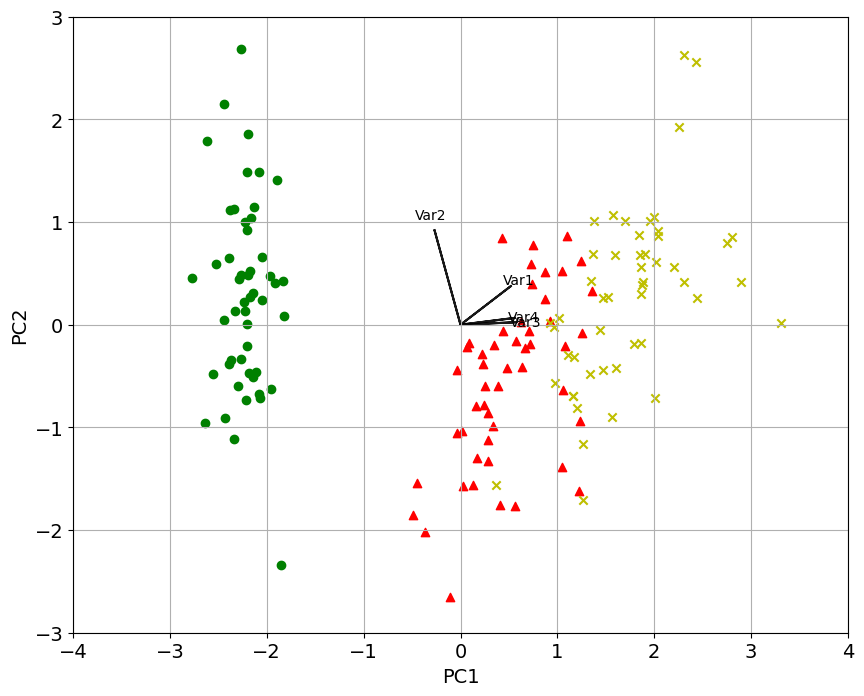

In [62]:
# Crea el biplot en los 2 primeros PC's del analisis de iris
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

De la grafica, podemos ver que:

a) La varianza está maximizada<br>
b) Las características 1, 3 y 4 son las más importantes para PC1.<br>
c) Las características 2, y 1 son las más importantes para PC2.
d) Las flechas (variables/características) que apuntan en la misma dirección indican correlación entre las variables que representan, mientras que las flechas que apuntan en direcciones opuestas indican un contraste entre las variables que representan. (Podemos verificarlo en el código siguiente)

In [63]:
# Var3 y Var4 estan extremadamente correlacionadas positivamente
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [64]:
# Var2 y Var3 están correlacionadas negativamente
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

Del grafico anterior comentamos que las variables la misma dirección (3 y 4) tienen una correlación positiva y que las flechas que apuntan en direcciones opuestas (2 y 3) una correlación negativa. 

Lo anterior lo vemos confirmado ya que la correlación entre las variables 3 y 4 es de 0.96, lo cual es una correlación positiva particularmente alta (el máximo es 1). Por el otro lado, la correlación entre las variables 2 y 3 es de -0.43 lo cual es una correlación negativa media. 

### Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.

**¿Qué es feature importance y para que nos sirve?**

La importancia de varaibles (feature importance) se refiere a la técnica de puntuaciones (scores) de todas las variables originales. Estas puntuaciones representan la "importancia" de cada variable. Por tanto, una puntuación más alta significa que la variable tendrá un mayor efecto en el modelo que se utiliza para predecir una determinada variable (en este caso PCA).

El análisis de componentes principales (PCA) es una herramienta útil para realizar el análisis de importancia de varaibles (feature importance) ya que cada PC está compuesto por diversos pesos de las variables originales. Para este tipo de análisis en específico, las puntuaciones de las que se habla en el parrafo anterior son los pesos de cada variable original en cada componente principal,PC.

Para este ejemplo se uso el conjunto de datos Iris. El conjunto de datos Iris, es un conjunto de datos muy conocido, presentado por Ronald Fisher en 1936. El conjunto mide las variables largo de sépalo (variable 1), ancho de sépalo (variable 2), largo de pétalo (variable 3) y ancho de pétalo (variable 4)	de las 3 especies de la flor iris (especies: setosa, versicolor, virginica).

El método components_ de pca resulto en una matriz donde estan los pesos de las variables originales en los PC. De ahí encontramos que, PC 1 se compone de 0.52 de la variable 1, 0.27 de la variable 2, 0.58 de la variable 3 y 0.56 de la variable 4. Y que, PC 2 que se compone de 0.38 de la variable 1, 0.92 de la variable 2, 0.02 de la variable 3 y 0.07 de la variable 4.

Lo anterior, nos dice que para PC 1 las variables más importantes son la 3 y la 4 (en ese orden) y para PC 2 las variables más importantes son 2 y 1 (en ese orden).

De esta manera, el componente principal 1 le da importancia a el largo del pétado y a el ancho del pétalo; y, el componente principal 2 le da importancia a el ancho del sépalo y a el largo del sépalo. Por tanto, podríamos decir que el componente 1 nos da información del pétalo y el 2 del sépalo. 

De esta manera, no solo utilizamos PCA para reducir la dimensionalidad de 4 a 2 variables, sino que gracias al análisis de importancia de variables, tenemos unos PC, que son más interpretables.

En conclusión, la importancia de variables nos sirve para encontrar cuales son las variables más importantes o las variables que explican una mayor parte de la variación de un conjunto de datos. Esto, a su vez nos ayuda a comprender mejor el conjunto de datos y a poder interpretar de mejor manera los resultados.

**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

Los hallazgos más importantes fueron que con solo dos PC puede ser explicada el 95% de la variabilidad total de los datos. Y que, como mencione anteriormente, el PC 1 se compone de 0.52 de la variable 1, 0.27 de la variable 2, 0.58 de la variable 3 y 0.56 de la variable 4; y el PC 2 que se compone de 0.38 de la variable 1, 0.92 de la variable 2, 0.02 de la variable 3 y 0.07 de la variable 4.

**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

 El PCA es una técnica que principalmente es de utilidad para reducir problemas de dimensionalidad (existen demasiadas variables) y problemas de multicolinealidad (que una o más variables explicativas están correlacionadas).